In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Height_weight.csv")
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [10]:
df.keys()

Index(['Height', 'Weight'], dtype='object')

In [5]:
x = df.iloc[:, :1].values
y = df.iloc[:, 1].values

In [12]:
x

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [6]:
y

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

In [30]:
model = lr()
model.fit(df[['Height']], df['Weight'])

df['pd_Weight'] = model.predict(df[['Height']])

df

,Height,Weight,pd_Weight
0,1.47,52.21,51.008158
1,1.50,53.12,52.846324
2,1.52,54.48,54.071768
3,1.55,55.84,55.909933
4,1.57,57.20,57.135377
5,1.60,58.57,58.973543
6,1.63,59.93,60.811708
7,1.65,61.29,62.037152
8,1.68,63.11,63.875317
9,1.70,64.47,65.100761


In [31]:
fig = px.scatter(df, x='Height', y='Weight', opacity=0.65, labels={'Height': 'Height (m)', 'Weight': 'Weight (kg)'}, title='Best Fit line')
fig.add_scatter(x=df['Height'], y=df['pd_Weight'], mode='lines', name='Best Fit Line')
fig.show()

In [9]:
MachineBrain = lr()
MachineBrain.fit(x, y)

LinearRegression()

In [13]:
m = MachineBrain.coef_
c = MachineBrain.intercept_
m, c

(array([61.27218654]), -39.061955918843935)

In [14]:
y_pred = m * 1.47 + c
y_pred

array([51.0081583])

In [10]:
h1 = 1.76
h2 = 1.62
w  = MachineBrain.predict([[h1], [h2]])
w

array([68.7770924 , 60.19898628])

ValueError: x and y must have same first dimension, but have shapes (15, 1) and (1,)

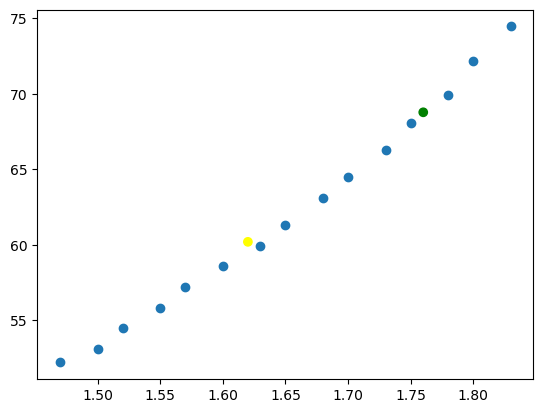

In [15]:
plt.scatter(x,y)
plt.scatter([h1 ,h2], w, color = ['green', 'yellow'])
plt.plot(x, y_pred, c = 'red')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## Minor Project

In [1]:
import cv2
import numpy as np
import pyautogui
import tkinter as tk
from tkinter import messagebox
import threading
import keyboard

# Function to start screen recording
def start_recording():
    global recording, out
    recording = True

    # Hide the Tkinter window
    win.withdraw()
   
    # Screen size
    screen_width, screen_height = pyautogui.size()
   
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter("screen_recording.avi", fourcc, 20.0, (screen_width, screen_height))

    # Start recording in a separate thread
    threading.Thread(target=record_screen).start()

def record_screen():
    global recording
    while recording:
        img = pyautogui.screenshot()
        frame = np.array(img)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        out.write(frame)
   
    # Release the video writer object
    out.release()

    # Show a message box to inform the user
    messagebox.showinfo("Screen Recorder", "Recording saved as screen_recording.avi")

    # Close the Tkinter window and exit the program
    win.quit()

def stop_recording_by_key(event):
    global recording
    if event.name == 'z':
        recording = False

# Create the main window
win = tk.Tk()
win.title("Screen Recorder")
win.geometry("300x150")

recording = False
out = None

# Create a button to start recording
btn_start = tk.Button(win, text="Start Recording", command=start_recording, font=('Times New Roman', 20))
btn_start.pack(pady=10)

# Listen for the 'z' key press in a separate thread
keyboard_thread = threading.Thread(target=keyboard.on_press, args=(stop_recording_by_key))
keyboard_thread.start()

# Run the application
win.mainloop()

Exception in thread Thread-5 (on_press):
Traceback (most recent call last):
  File "c:\Users\91629\anaconda3\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\91629\anaconda3\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: keyboard.on_press() argument after * must be an iterable, not function


In [18]:
from drawdata import draw_scatter
draw_scatter()

In [21]:
m = 0
c = 0
L = 0.01
n = 500000

In [22]:
All_Errors = []
All_Slope = []
All_Intercept = []
for i in range(n):
    Y_predict = m*x+c
    error = np.mean((y - Y_predict)**2)
    All_Errors.append(error)
    D_m = (-2/len(x))*(sum(y-Y_predict)*x)
    D_c = (-2/len(x))*(sum(y-Y_predict)*1)
    step_size = D_m * L
    m = m - D_m * L
    All_Slope.append(m)
    c = c - D_c * L
    All_Intercept.append(c)
All_Errors[-1]


37.06204529289486

In [23]:
m

array([[20.53817623, 20.89614866, 21.43114042, 21.96613217, 22.50112393,
        23.04004945, 23.57504121, 24.11003297, 24.82597782, 25.36096958,
        26.07298067, 26.78892552, 27.50487037, 28.39783456, 29.29079874],
       [20.95732269, 21.32260067, 21.86851063, 22.41442059, 22.96033054,
        23.51025454, 24.0561645 , 24.60207446, 25.33263043, 25.87854039,
        26.60508231, 27.33563829, 28.06619426, 28.9773822 , 29.88857014],
       [21.23675366, 21.60690201, 22.16009077, 22.71327953, 23.26646828,
        23.8237246 , 24.37691336, 24.93010212, 25.67039884, 26.22358759,
        26.95981675, 27.70011346, 28.44041018, 29.3637473 , 30.28708441],
       [21.65590011, 22.03335403, 22.59746098, 23.16156794, 23.72567489,
        24.2939297 , 24.85803665, 25.42214361, 26.17705144, 26.7411584 ,
        27.49191839, 28.24682623, 29.00173407, 29.94329494, 30.88485582],
       [21.93533108, 22.31765537, 22.88904113, 23.46042688, 24.03181264,
        24.60739976, 25.17878551, 25.75017127, 

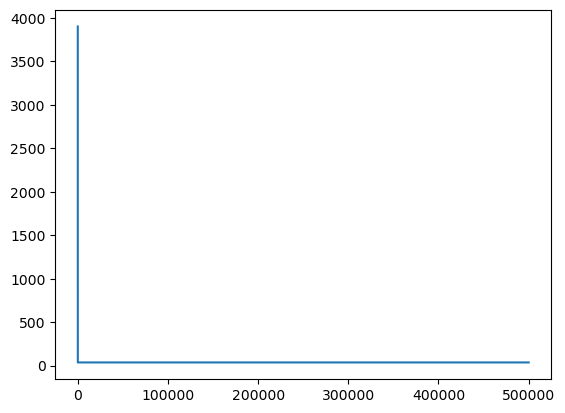

In [24]:
plt.plot(All_Errors)

### Multiple Linear Regression